# 2D plot Analysis

In [1]:
import numpy as np # Use version 1.x not 2.x
import random
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
import pickle

def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    records = []
    for company, periods in data.items():
        for period, (features, rating) in periods.items():
            record = {
                'company': company,
                'period': period,
                **{f'feature_{i}': feature.item() for i, feature in enumerate(features)},
                'rating': int(rating.item())
            }
            records.append(record)

    return pd.DataFrame(records)

## PCA

#### Time window = 1

In [3]:
from sklearn.preprocessing import StandardScaler

train_df = load_data('./data/train_dict.pkl')
test_df = load_data('./data/test_dict.pkl')

merged_df = pd.concat([train_df, test_df], ignore_index=True)

X = merged_df.drop(columns=['company', 'period', 'rating'])
y = merged_df['rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

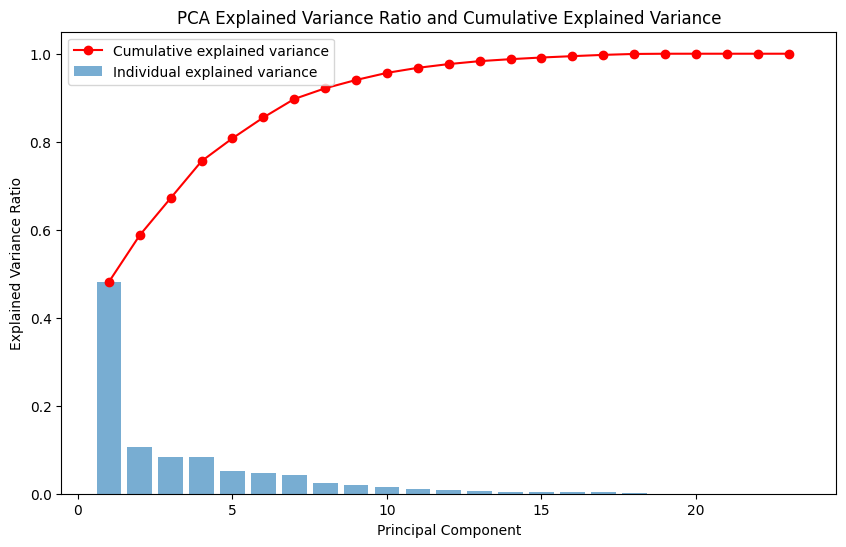

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio and Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()

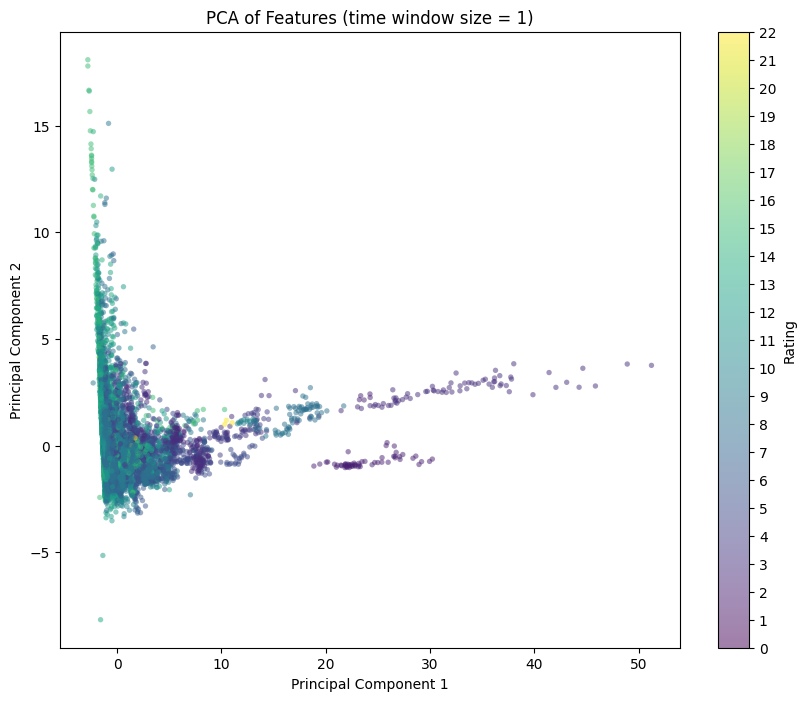

In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

pca_df = pd.concat([pca_df, y], axis=1)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['rating'], cmap='viridis', s=15, edgecolor='none', alpha=0.5)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Rating')
max_rating = int(pca_df['rating'].max())
min_rating = int(pca_df['rating'].min())
colorbar.set_ticks(np.arange(min_rating, max_rating + 1))

plt.title('PCA of Features (time window size = 1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Time window = 4

In [6]:
from sklearn.preprocessing import StandardScaler

train_df = load_data('./data/train_dict_windowed.pkl')
test_df = load_data('./data/test_dict_windowed.pkl')

merged_df = pd.concat([train_df, test_df], ignore_index=True)

X = merged_df.drop(columns=['company', 'period', 'rating'])
y = merged_df['rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

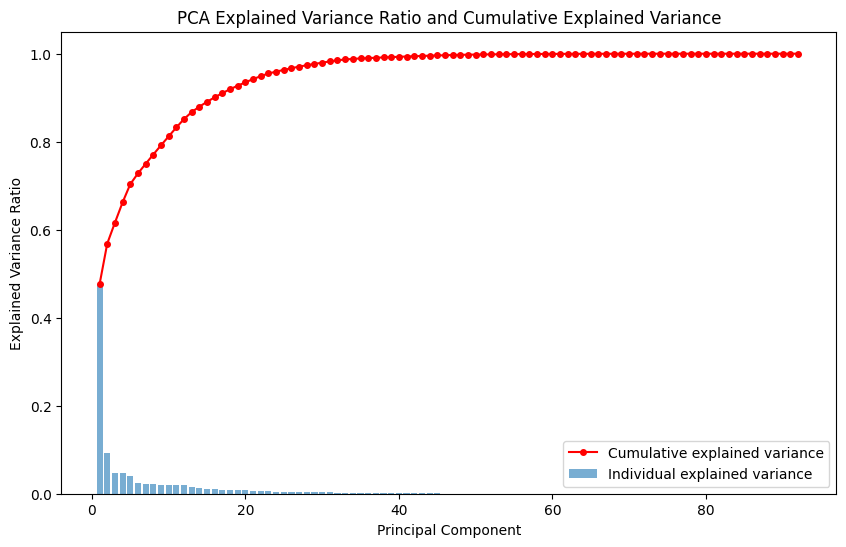

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', color='red', markersize=4, label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio and Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()

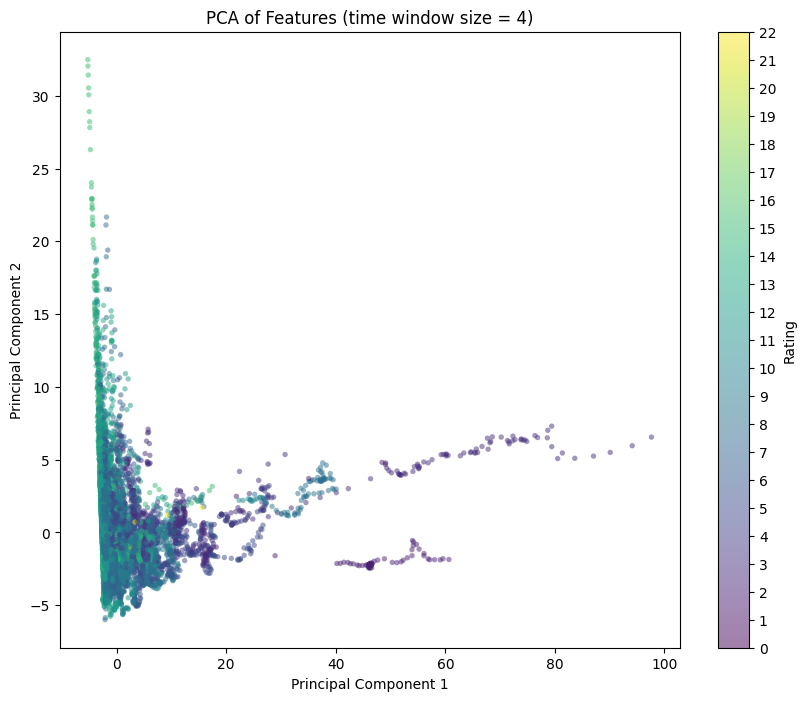

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

pca_df = pd.concat([pca_df, y], axis=1)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['rating'], cmap='viridis', s=15, edgecolor='none', alpha=0.5)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Rating')
max_rating = int(pca_df['rating'].max())
min_rating = int(pca_df['rating'].min())
colorbar.set_ticks(np.arange(min_rating, max_rating + 1))

plt.title('PCA of Features (time window size = 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Appendix: Feature Analysis

All results below are for time window size = 1.

In [9]:
train_df = load_data('./data/train_dict.pkl')
test_df = load_data('./data/test_dict.pkl')

merged_df = pd.concat([train_df, test_df], ignore_index=True)
merged_df = merged_df.drop(columns=['company', 'period'])

## Correlation Matrix

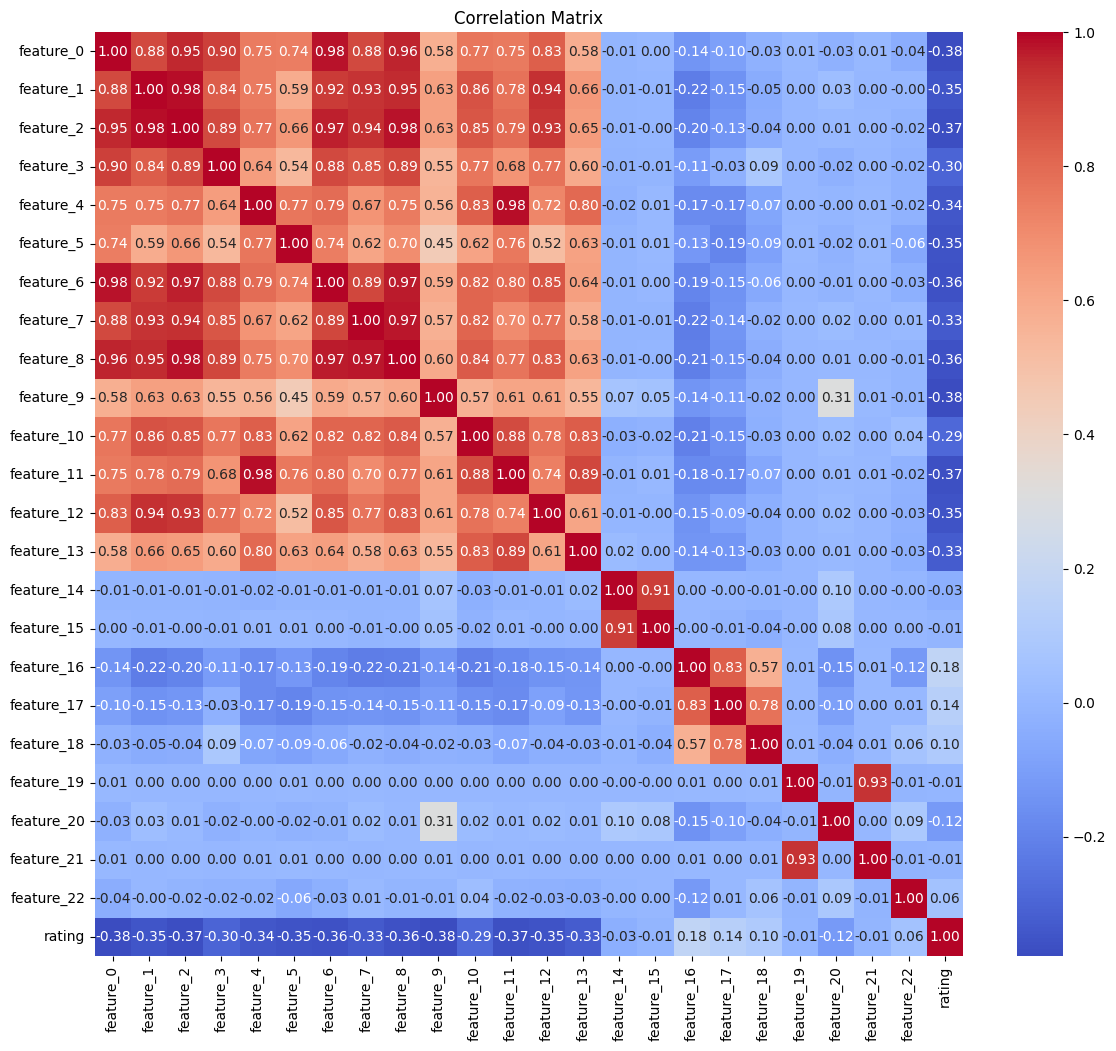

In [10]:
import pandas as pd
import seaborn as sns

corr_matrix = merged_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Correlation with rating

In [11]:
rating_corr = merged_df.corr()['rating'].sort_values(ascending=False)
print(rating_corr)

rating        1.000000
feature_16    0.175036
feature_17    0.138620
feature_18    0.101439
feature_22    0.057576
feature_19   -0.005210
feature_21   -0.011087
feature_15   -0.011385
feature_14   -0.033860
feature_20   -0.117012
feature_10   -0.290412
feature_3    -0.299161
feature_13   -0.326473
feature_7    -0.330819
feature_4    -0.340713
feature_1    -0.348997
feature_5    -0.353589
feature_12   -0.353779
feature_8    -0.356480
feature_6    -0.361769
feature_11   -0.365952
feature_2    -0.369768
feature_9    -0.377109
feature_0    -0.377989
Name: rating, dtype: float64


## Clustering

Use distance matrix based on correlation matrix.

In [12]:
from sklearn.preprocessing import StandardScaler

features = merged_df.drop(columns=['rating'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

corr_matrix = np.corrcoef(scaled_features, rowvar=False)
distance_matrix = 1 - np.abs(corr_matrix)

### Hierarchical Clustering

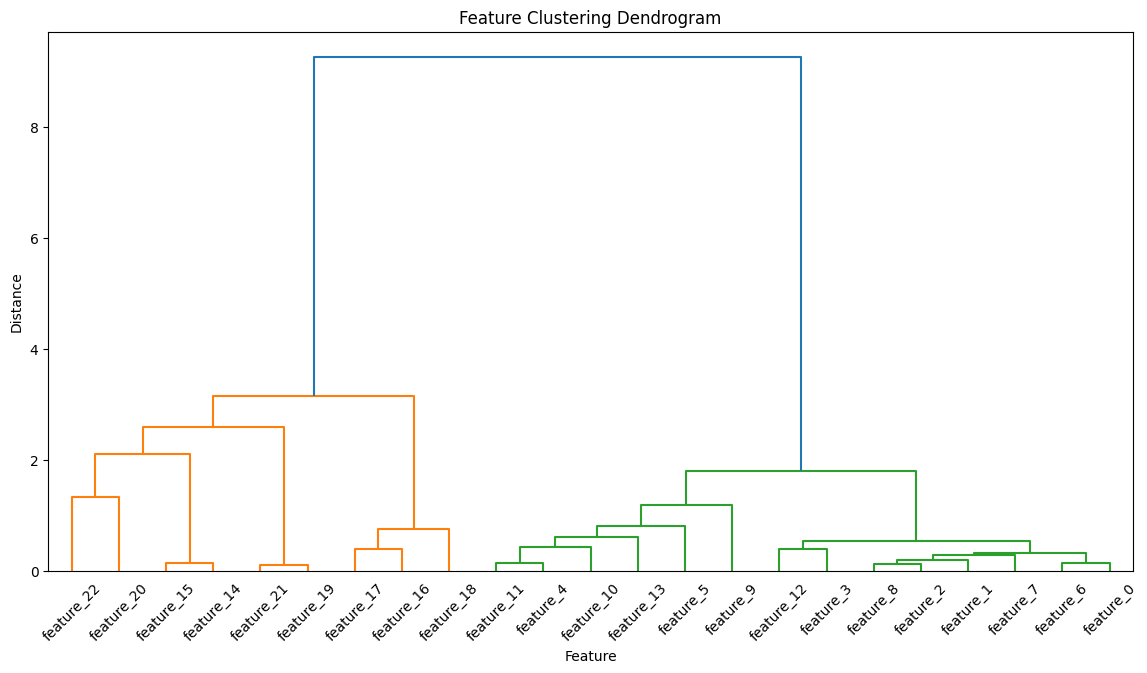

In [13]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

condensed_distance = pdist(distance_matrix)

linked = linkage(condensed_distance, method='ward')

plt.figure(figsize=(14, 7))
dendrogram(linked,
           orientation='top',
           labels=features.columns,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Feature Clustering Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()

### K-means

Use the elbow method to determin the number of clusters (k)

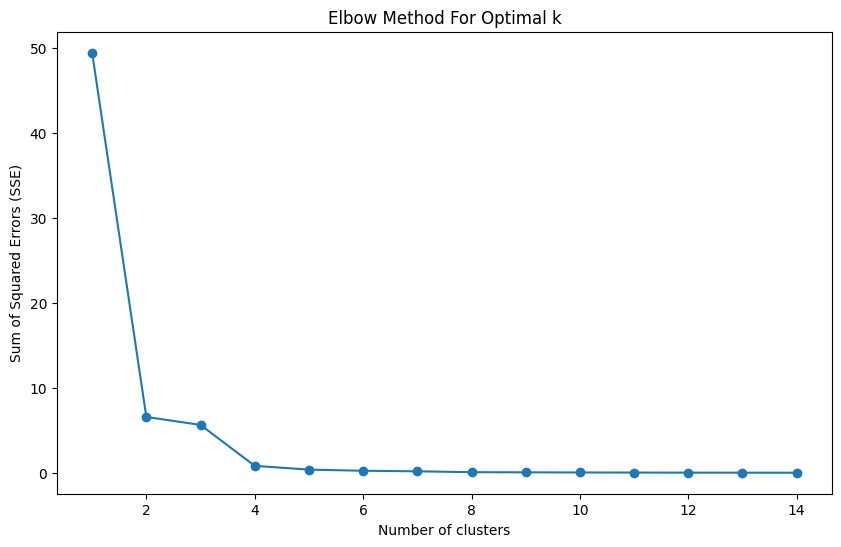

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
pca_features = pca.fit_transform(distance_matrix)

sse = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

Perform K-means clustering

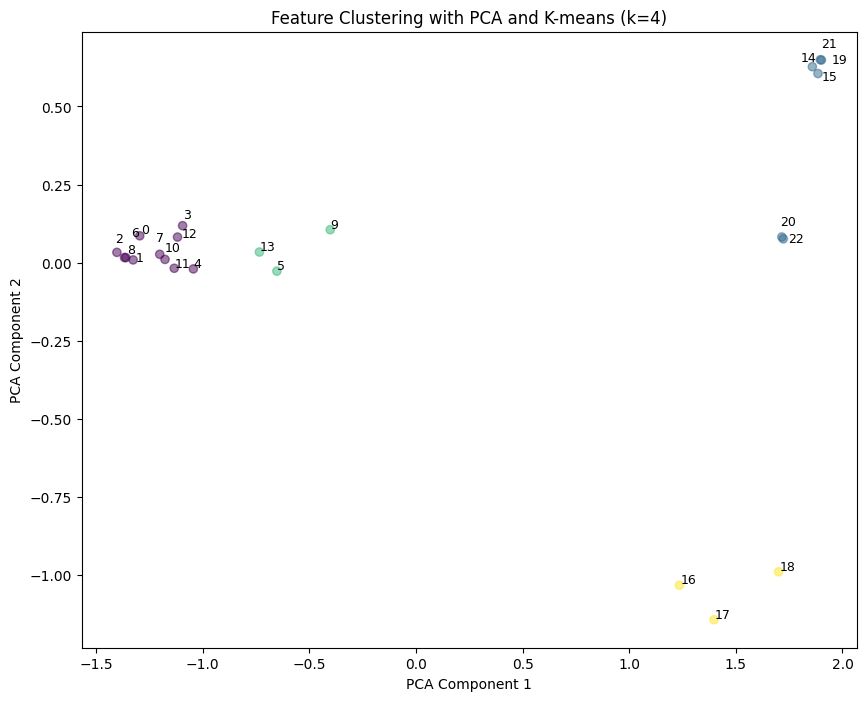

In [15]:
from adjustText import adjust_text

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED)
kmeans.fit(pca_features)
labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis', alpha=0.5)

texts = []
for i, txt in enumerate(features.columns):
    texts.append(plt.annotate(txt.split('_')[-1], (pca_features[i, 0], pca_features[i, 1]), fontsize=9))

adjust_text(texts)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Feature Clustering with PCA and K-means (k={n_clusters})')
plt.show()